<a href="https://colab.research.google.com/github/hoonzi-s/xgboost/blob/main/04.%20%EA%B7%B8%EB%A0%88%EC%9D%B4%EB%94%94%EC%96%B8%ED%8A%B8%20%EB%B6%80%EC%8A%A4%ED%8C%85%EC%97%90%EC%84%9C%20XGBoost%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
# xgb.set_config(verbosity = 0)
import seaborn as sns
sns.set()

In [2]:
head = 'https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter'
tail = '04/bike_rentals_cleaned.csv'
link = head + tail

df_bikes = pd.read_csv(link)
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [3]:
x_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x_bikes, y_bikes, random_state = 2)

In [4]:
from sklearn.tree import DecisionTreeRegressor
tree_1 = DecisionTreeRegressor(max_depth = 2, random_state = 2)
tree_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [5]:
y_train_pred = tree_1.predict(x_train)
y2_train = y_train - y_train_pred

In [6]:
tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 2)
tree_2.fit(x_train, y2_train)
y2_train_pred = tree_2.predict(x_train)
y3_train = y2_train - y2_train_pred

tree_3 = DecisionTreeRegressor(max_depth = 2, random_state = 2)
tree_3.fit(x_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [7]:
y1_pred = tree_1.predict(x_test)
y2_pred = tree_2.predict(x_test)
y3_pred = tree_3.predict(x_test)

y_pred = y1_pred + y2_pred + y3_pred
from sklearn.metrics import mean_squared_error as MSE
MSE(y_test, y_pred) ** 0.5

911.0479538776444

In [8]:
res_1 = y_train - np.mean(y_train)

tree_1.fit(x_train, res_1)
pred_1 = tree_1.predict(x_train)
res_2 = y_train - pred_1

tree_2.fit(x_train, res_2)
pred_2 = tree_2.predict(x_train)
res_3 = y_train - (pred_1 + pred_2)

tree_3.fit(x_train, res_3)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [9]:
pred_all = tree_1.predict(x_test) + tree_2.predict(x_test) + tree_3.predict(x_test)
MSE(y_test, pred_all, squared = False)    # RMSE 값 구하기

911.0479538776432

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
gbr = GradientBoostingRegressor(max_depth = 2, random_state = 2, n_estimators = 3, learning_rate = 1)

In [12]:
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred, squared = False)

911.0479538776439

In [13]:
gbr = GradientBoostingRegressor(max_depth = 2, random_state = 2, n_estimators = 30, learning_rate = 1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred, squared = False)

857.1072323426944

In [14]:
gbr = GradientBoostingRegressor(max_depth = 2, random_state = 2, n_estimators = 300, learning_rate = 1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred, squared = False)

936.3617413678853

In [15]:
gbr = GradientBoostingRegressor(max_depth = 2, random_state = 2, n_estimators = 300)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred, squared = False)

653.7456840231495

In [16]:
lr_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

In [17]:
for value in lr_values:
  gbr = GradientBoostingRegressor(max_depth = 2, random_state = 2, n_estimators = 300, learning_rate = value)
  gbr.fit(x_train, y_train)
  y_pred = gbr.predict(x_test)
  rmse = MSE(y_test, y_pred, squared = False)
  print(f'학습률: {value}, 점수: {rmse}')

학습률: 0.001, 점수: 1633.0261400367258
학습률: 0.01, 점수: 831.5430182728547
학습률: 0.05, 점수: 685.0192988749717
학습률: 0.1, 점수: 653.7456840231495
학습률: 0.15, 점수: 687.666134269379
학습률: 0.2, 점수: 664.312804425697
학습률: 0.3, 점수: 689.4190385930236
학습률: 0.5, 점수: 693.8856905068778
학습률: 1.0, 점수: 936.3617413678853


In [18]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
  gbr = GradientBoostingRegressor(max_depth = depth, random_state = 2, n_estimators = 300)
  gbr.fit(x_train, y_train)
  y_pred = gbr.predict(x_test)
  rmse = MSE(y_test, y_pred, squared = False)
  print(f'최대 깊이: {depth}, 점수: {rmse}')

최대 깊이: None, 점수: 869.2788645118395
최대 깊이: 1, 점수: 707.8261886858736
최대 깊이: 2, 점수: 653.7456840231495
최대 깊이: 3, 점수: 646.4045923317708
최대 깊이: 4, 점수: 663.048387855927


In [20]:
gbr.init_

DummyRegressor()

In [22]:
len(gbr.estimators_)

300

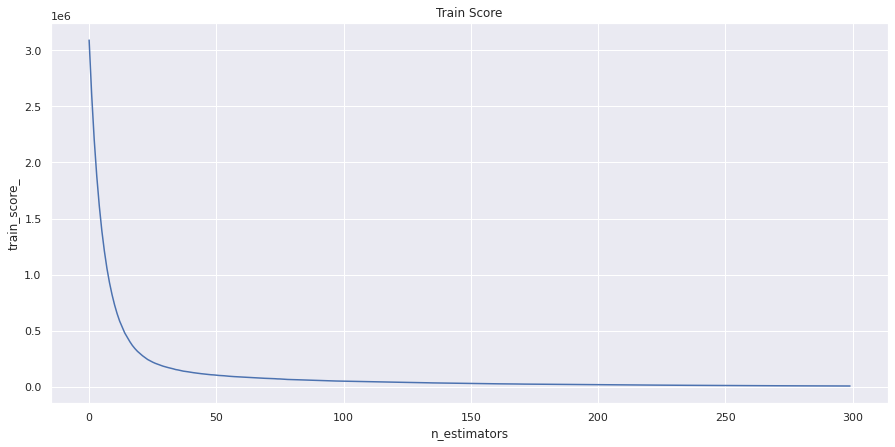

In [27]:
plt.figure(figsize = (15, 7))
plt.plot(range(300), gbr.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()

In [32]:
samples = np.arange(1, 0.4, -0.1)
for sample in samples:
  gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 300, subsample = sample, random_state = 2)
  gbr.fit(x_train, y_train)
  y_pred = gbr.predict(x_test)
  rmse = MSE(y_test, y_pred) ** 0.5
  print('subsample:', sample, ', 점수:', rmse)

subsample: 1.0 , 점수: 646.4045923317708
subsample: 0.9 , 점수: 620.1819001443569
subsample: 0.8 , 점수: 617.2355650565677
subsample: 0.7000000000000001 , 점수: 612.9879156983139
subsample: 0.6000000000000001 , 점수: 622.6385116402317
subsample: 0.5000000000000001 , 점수: 626.9974073227554


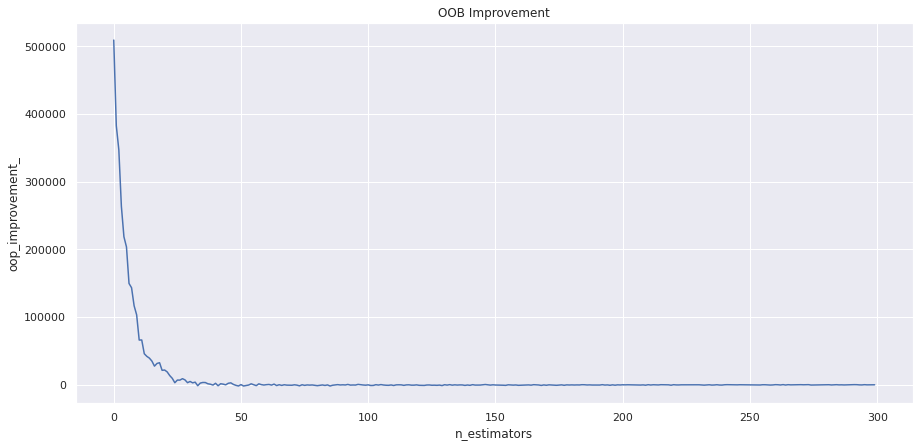

In [33]:
plt.figure(figsize = (15, 7))
plt.plot(range(300), gbr.oob_improvement_)
plt.xlabel('n_estimators')
plt.ylabel('oop_improvement_')
plt.title('OOB Improvement')
plt.show()

In [34]:
params = {'subsample': [0.65, 0.70, 0.75],
          'n_estimators': [300, 500, 1000],
          'learning_rate': [0.05, 0.075, 0.1]}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
gbr = GradientBoostingRegressor(max_depth = 3, random_state = 2)

In [36]:
rand_reg = RandomizedSearchCV(gbr, params, n_iter = 10, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, random_state = 2)

In [41]:
rand_reg.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=2),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.075, 0.1],
                                        'n_estimators': [300, 500, 1000],
                                        'subsample': [0.65, 0.7, 0.75]},
                   random_state=2, scoring='neg_mean_squared_error')

In [43]:
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
print('최상의 매개변수:', best_params)
best_score = np.sqrt(-rand_reg.best_score_)
print(f'훈련 점수: {best_score:.3f}')
y_pred = best_model.predict(x_test)
rmse_test = MSE(y_test, y_pred)
print(f'테스트 세트 점수: {rmse_test**0.5:.3f}')

최상의 매개변수: {'subsample': 0.65, 'n_estimators': 300, 'learning_rate': 0.05}
훈련 점수: 636.200
테스트 세트 점수: 625.985


In [45]:
gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 1600, subsample = 0.75, learning_rate = 0.02, random_state = 2)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred) ** 0.5

596.9544588974487

In [49]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(max_depth = 3, n_estimatos = 1600, eta = 0.02, subsample = 0.75, random_state = 2)
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)
MSE(y_test, y_pred) ** 0.5

[02:19:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


611.7382313363339

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
df = pd.read_csv('/content/drive/MyDrive/exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [60]:
df.shape

(5087, 3198)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [62]:
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [63]:
df.isnull().sum().sum()

0

In [64]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
x_train, x_test, y_train, y_test = tts(x, y, random_state = 2)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [66]:
import time

In [72]:
start = time.time()
df.info()
end = time.time()
elapsed = end - start
print(f'실행 시간: {elapsed}초')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB
실행 시간: 0.040051937103271484초


In [73]:
%timeit -n 100 -r 3 sum(np.square(range(10000)))

2.81 ms ± 376 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [74]:
%%timeit -n 100 -r 3
summing = 0
for i in range(10000):
  summing += i ** 2


4.47 ms ± 545 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [75]:
start = time.time()
gbr = GradientBoostingClassifier(n_estimators = 100, max_depth = 2, random_state = 2)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
score = accuracy_score(y_test, y_pred)
end = time.time()
print('점수:', score)
print('실행 시간:', end - start)

점수: 0.9874213836477987
실행 시간: 277.9962468147278


In [76]:
start = time.time()
xg_cls = XGBClassifier(n_estimators = 100, max_depth = 2)
xg_cls.fit(x_train, y_train)
y_pred = xg_cls.predict(x_test)
score = accuracy_score(y_test, y_pred)
end = time.time()
print('점수:', score)
print('실행 시간:', end - start)

점수: 0.9913522012578616
실행 시간: 45.969202756881714
